In [8]:
import sys
from qiskit.circuit import QuantumCircuit
from qiskit.providers.basic_provider import BasicProvider, BasicSimulator
import qiskit.qasm3


FILE_ERROR: str = "[ERROR]: FILE_NOT_FOUND"
QASM_RUN_COMPLETE: str = "[OUTCOME]: QASM_RUN_COMPLETE"

def run_qasm_file(file_path: str, file_operation: str) -> str:
    qasm_file = open(file_path, file_operation)
    data = qasm_file.read()
    #print(data)
    
    return data

if __name__ == "__main__":
    print("main() HIT")

    d = run_qasm_file('ghz.qasm', "r")
    
    program = f"""{d}"""
    circuit = qiskit.qasm3.loads(program)
    circuit.draw("mpl")

main() HIT


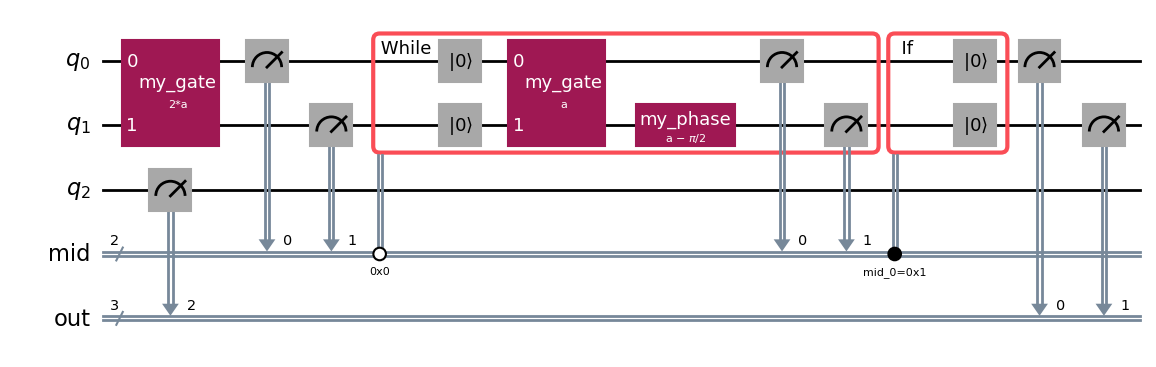

In [3]:
program = """
 OPENQASM 3.0;
include "stdgates.inc";

input float[64] a;
qubit[3] q;
bit[2] mid;
bit[3] out;

let aliased = q[0:1];

gate my_gate(a) c, t {
    gphase(a / 2);
    ry(a) c;
    cx c, t;
}
gate my_phase(a) c {
    ctrl @ inv @ gphase(a) c;
}

my_gate(a * 2) aliased[0], q[{1, 2}][0];
measure q[0] -> mid[0];
measure q[1] -> mid[1];

while (mid == "00") {
    reset q[0];
    reset q[1];
    my_gate(a) q[0], q[1];
    my_phase(a - pi/2) q[1];
    mid[0] = measure q[0];
    mid[1] = measure q[1];
}

if (mid[0]) {
    let inner_alias = q[{0, 1}];
    reset inner_alias;
}

out = measure q;
"""
circuit = qiskit.qasm3.loads(program)
circuit.draw("mpl")